# BFS CredX Data - Group 48

# Step 1 : Read data sets

In [140]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

demographic_data = pd.read_csv("E:\\Sushma\\BFSI - Domain Elective\\Capstone Project\\Demographic data.csv", sep=",")
demographic_data.shape

(71295, 12)

In [3]:
# To display no of rows and column as required
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', 500)

In [4]:
# bureau_data = pd.read_csv("E:\\Sushma\\BFSI - Domain Elective\\Capstone Project\\Credit Bureau data.csv", sep=",")
bureau_data = pd.read_csv("E:\\Sushma\\BFSI - Domain Elective\\Capstone Project\\Credit Bureau data.csv", sep=",")

bureau_data.shape

(71295, 19)

## Merge the data sets

In [5]:
Loan_Data = pd.merge(demographic_data, bureau_data,how='inner', left_on='Application ID', right_on = 'Application ID')

# Step 2: Data Understanding

In [6]:
Loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71301 entries, 0 to 71300
Data columns (total 30 columns):
Application ID                                                     71301 non-null int64
Age                                                                71301 non-null int64
Gender                                                             71299 non-null object
Marital Status (at the time of application)                        71295 non-null object
No of dependents                                                   71298 non-null float64
Income                                                             71301 non-null float64
Education                                                          71182 non-null object
Profession                                                         71287 non-null object
Type of residence                                                  71293 non-null object
No of months in current residence                                  71301 non-null int64
No

In [7]:
Loan_Data.head()

Application ID  Age Gender Marital Status (at the time of application)  \
0       954457215   48      F                                     Married   
1       432830445   31      M                                     Married   
2       941387308   32      M                                      Single   
3       392161677   43      M                                     Married   
4       182011211   35      F                                     Married   

   No of dependents  Income     Education Profession  Type of residence  \
0               2.0    40.0      Bachelor         SAL            Rented   
1               4.0    55.0  Professional     SE_PROF            Rented   
2               2.0    46.0      Bachelor     SE_PROF            Rented   
3               1.0    53.0      Bachelor          SE            Rented   
4               5.0    44.0  Professional         SAL            Rented   

   No of months in current residence  No of months in current company  \
0                                113                               56   
1                                112                               46   
2                                104                               49   
3                                 94                               53   
4                                112                               43   

   Performance Tag_x  No of times 90 DPD or worse in last 6 months  \
0                0.0                                             0   
1                0.0                                             0   
2                0.0                                             0   
3                0.0                                             0   
4                0.0                                             0   

   No of times 60 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 30 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 90 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 60 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 30 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Avgas CC Utilization in last 12 months  \
0                                     4.0   
1                                     3.0   
2                                     7.0   
3                                    11.0   
4                                    12.0   

   No of trades opened in last 6 months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2             

Check to see if Performance Tag for both tables are having the same values, so that 1 can be dropped

In [8]:
Loan_Data[Loan_Data['Performance Tag_x'] != Loan_Data['Performance Tag_y']]

Application ID  Age Gender Marital Status (at the time of application)  \
5244        653287861   26      M                                     Married   
5245        653287861   40      M                                     Married   
69609       906908303   35      M                                      Single   
69610        10990583   47      F                                     Married   
69611       589678446   46      M                                     Married   
69612       809411322   41      M                                     Married   
69613       150246616   42      F                                     Married   
69614       216681850   46      M                                     Married   
69615       413788459   29      M                                     Married   
69616       666004143   57      M                                     Married   
69617       505448697   39      F                                     Married   
69618        16819814   43      M                                     Married   
69619       597014646   41      M                                     Married   
69620       213641861   47      M                                     Married   
69621       937207017   45      M                                     Married   
69622       440239410   28      M                                     Married   
69623       640400319   39      M                                     Married   
69624       711553616   39      M                                      Single   
69625       770166271   51      M                                      Single   
69626       394688335   29      M                                     Married   
69627       314215200   38      M                                     Married   
69628       240686069   41      M                                     Married   
69629       616522493   51      M                                     Married   
69630        79302424   63      M                                     Married   
69631       335319911   38      M                                      Single   
69632       293623462   37      M                                     Married   
69633        57924359   43      M                                     Married   
69634       740441885   47      M                                     Married   
69635       158463558   36      M                                     Married   
69636       249413068   32      F                                     Married   
69637       522358079   55      F                                     Married   
69638       931921916   55      M                                     Married   
69639       555412665   39      F                                     Married   
69640       284179953   62      M                                     Married   
69641       413413494   45      M                                     Married   
69642       918141475   30      M                                      Single   
69643       572583679   28      M                                      Single   
69644       365975893   28      M                                      Single   
69645       746226147   50      M                                     Married   
69646       962731222   47      M                                     Married   
69647       664512020   33      M                                     Married   
69648       783332601   46      F                                     Married   
69649       362989607   52      M                                     Married   
69650       101463744   39      F                                      Single   
69651       407213967   43      F                                     Married   
69652       994081387   39      M                                     Married   
69653        50411106   59      M                                     Married   
69654       598249946   38      F                                     Married   
69655       701676033   44      M     

They dont see to be the same. Lets analyse the data set to identify issues if any

# Step 3: Data PreProcessing

1. Duplicates in application ID

In [9]:
dups = Loan_Data.groupby('Application ID')['Application ID'].count()

In [10]:
dups_df=pd.DataFrame(dups)

In [11]:
dups_df = dups_df[dups_df['Application ID'] > 1]

In [12]:
dups_series = pd.Series(dups_df['Application ID'], index=dups_df.index)

In [13]:
dups_series

Application ID
653287861    4
671989187    4
765011468    4
Name: Application ID, dtype: int64

In [14]:
Loan_Data_copy = Loan_Data

In [15]:
Loan_Data[Loan_Data['Application ID'].isin([671989187,653287861,765011468])]

Application ID  Age Gender Marital Status (at the time of application)  \
5243        653287861   26      M                                     Married   
5244        653287861   26      M                                     Married   
5245        653287861   40      M                                     Married   
5246        653287861   40      M                                     Married   
24389       765011468   57      M                                      Single   
24390       765011468   57      M                                      Single   
24391       765011468   38      M                                     Married   
24392       765011468   38      M                                     Married   
48606       671989187   27      M                                     Married   
48607       671989187   27      M                                     Married   
48608       671989187   57      M                                     Married   
48609       671989187   57      M                                     Married   

       No of dependents  Income     Education Profession   \
5243                3.0    25.0      Bachelor         SAL   
5244                3.0    25.0      Bachelor         SAL   
5245                5.0    32.0           Phd          SE   
5246                5.0    32.0           Phd          SE   
24389               4.0     4.5      Bachelor         SAL   
24390               4.0     4.5      Bachelor         SAL   
24391               4.0     4.5  Professional         SAL   
24392               4.0     4.5  Professional         SAL   
48606               2.0    35.0  Professional         SAL   
48607               2.0    35.0  Professional         SAL   
48608               4.0     7.0  Professional          SE   
48609               4.0     7.0  Professional          SE   

         Type of residence  No of months in current residence  \
5243                Rented                                112   
5244                Rented                                112   
5245                Rented                                 45   
5246                Rented                                 45   
24389     Company provided                                  6   
24390     Company provided                                  6   
24391               Rented                                  6   
24392               Rented                                  6   
48606  Living with Parents                                108   
48607  Living with Parents                                108   
48608               Rented                                 42   
48609               Rented                                 42   

       No of months in current company  Performance Tag_x  \
5243                                58                0.0   
5244                                58                0.0   
5245                                46                1.0   
5246                                46                1.0   
24389                               56                0.0   
24390                               56                0.0   
24391                               72                0.0   
24392                               72                0.0   
48606                                7                0.0   
48607                                7                0.0   
48608                                3                0.0   
48609                                3                0.0   

       No of times 90 DPD or worse in last 6 months  \
5243                                              0   
5244                                              1   
5245                                              0   
5246                                              1   
24389                                             0   
24390                                             0   
24391                                             0   
24392                                             0   
48606                   

In [16]:
Loan_Data[Loan_Data['Application ID'].duplicated()]

Application ID  Age Gender Marital Status (at the time of application)  \
5244        653287861   26      M                                     Married   
5245        653287861   40      M                                     Married   
5246        653287861   40      M                                     Married   
24390       765011468   57      M                                      Single   
24391       765011468   38      M                                     Married   
24392       765011468   38      M                                     Married   
48607       671989187   27      M                                     Married   
48608       671989187   57      M                                     Married   
48609       671989187   57      M                                     Married   

       No of dependents  Income     Education Profession   \
5244                3.0    25.0      Bachelor         SAL   
5245                5.0    32.0           Phd          SE   
5246                5.0    32.0           Phd          SE   
24390               4.0     4.5      Bachelor         SAL   
24391               4.0     4.5  Professional         SAL   
24392               4.0     4.5  Professional         SAL   
48607               2.0    35.0  Professional         SAL   
48608               4.0     7.0  Professional          SE   
48609               4.0     7.0  Professional          SE   

         Type of residence  No of months in current residence  \
5244                Rented                                112   
5245                Rented                                 45   
5246                Rented                                 45   
24390     Company provided                                  6   
24391               Rented                                  6   
24392               Rented                                  6   
48607  Living with Parents                                108   
48608               Rented                                 42   
48609               Rented                                 42   

       No of months in current company  Performance Tag_x  \
5244                                58                0.0   
5245                                46                1.0   
5246                                46                1.0   
24390                               56                0.0   
24391                               72                0.0   
24392                               72                0.0   
48607                                7                0.0   
48608                                3                0.0   
48609                                3                0.0   

       No of times 90 DPD or worse in last 6 months  \
5244                                              1   
5245                                              0   
5246                                              1   
24390                                             0   
24391                                             0   
24392                                             0   
48607                                             0   
48608                                             1   
48609                                             0   

       No of times 60 DPD or worse in last 6 months  \
5244                                              1   
5245                                              0   
5246                                              1   
24390                                             0   
24391                                             0   
24392                                             0   
48607                                             1   
48608                                             2   
48609                                             1   

       No of times 30 DPD or worse in last 6 months  \
5244                                              1   
5245                                              0   
5246                                              1   
2

In [17]:
Loan_Data.drop_duplicates(subset = ['Application ID'],inplace=True)

In [18]:
Loan_Data[Loan_Data['Application ID'].duplicated()]

Empty DataFrame
Columns: [Application ID, Age, Gender, Marital Status (at the time of application), No of dependents, Income, Education, Profession , Type of residence, No of months in current residence, No of months in current company, Performance Tag_x, No of times 90 DPD or worse in last 6 months, No of times 60 DPD or worse in last 6 months, No of times 30 DPD or worse in last 6 months, No of times 90 DPD or worse in last 12 months, No of times 60 DPD or worse in last 12 months, No of times 30 DPD or worse in last 12 months, Avgas CC Utilization in last 12 months, No of trades opened in last 6 months, No of trades opened in last 12 months, No of PL trades opened in last 6 months, No of PL trades opened in last 12 months, No of Inquiries in last 6 months (excluding home & auto loans), No of Inquiries in last 12 months (excluding home & auto loans), Presence of open home loan, Outstanding Balance, Total No of Trades, Presence of open auto loan, Performance Tag_y]
Index: []

In [19]:
# Loan_Data['Performance Tag_x'].fillna(0, inplace=True)
# Loan_Data['Performance Tag_y'].fillna(0, inplace=True)

In [20]:
Loan_Data[Loan_Data['Performance Tag_x'] != Loan_Data['Performance Tag_y']]

Application ID  Age Gender Marital Status (at the time of application)  \
69609       906908303   35      M                                      Single   
69610        10990583   47      F                                     Married   
69611       589678446   46      M                                     Married   
69612       809411322   41      M                                     Married   
69613       150246616   42      F                                     Married   
69614       216681850   46      M                                     Married   
69615       413788459   29      M                                     Married   
69616       666004143   57      M                                     Married   
69617       505448697   39      F                                     Married   
69618        16819814   43      M                                     Married   
69619       597014646   41      M                                     Married   
69620       213641861   47      M                                     Married   
69621       937207017   45      M                                     Married   
69622       440239410   28      M                                     Married   
69623       640400319   39      M                                     Married   
69624       711553616   39      M                                      Single   
69625       770166271   51      M                                      Single   
69626       394688335   29      M                                     Married   
69627       314215200   38      M                                     Married   
69628       240686069   41      M                                     Married   
69629       616522493   51      M                                     Married   
69630        79302424   63      M                                     Married   
69631       335319911   38      M                                      Single   
69632       293623462   37      M                                     Married   
69633        57924359   43      M                                     Married   
69634       740441885   47      M                                     Married   
69635       158463558   36      M                                     Married   
69636       249413068   32      F                                     Married   
69637       522358079   55      F                                     Married   
69638       931921916   55      M                                     Married   
69639       555412665   39      F                                     Married   
69640       284179953   62      M                                     Married   
69641       413413494   45      M                                     Married   
69642       918141475   30      M                                      Single   
69643       572583679   28      M                                      Single   
69644       365975893   28      M                                      Single   
69645       746226147   50      M                                     Married   
69646       962731222   47      M                                     Married   
69647       664512020   33      M                                     Married   
69648       783332601   46      F                                     Married   
69649       362989607   52      M                                     Married   
69650       101463744   39      F                                      Single   
69651       407213967   43      F                                     Married   
69652       994081387   39      M                                     Married   
69653        50411106   59      M                                     Married   
69654       598249946   38      F                                     Married   
69655       701676033   44      M                                     Married   
69656       483792267   44      F                                     Married   
69657       935864950   40      F     

In [21]:
Loan_Data.drop(columns=['Performance Tag_x'], inplace=True)

In [22]:
Loan_Data.rename(columns = {'Performance Tag_y': 'Performance Tag'}, inplace=True) 

2. Data Subset

In [23]:
rejected_rows = Loan_Data[Loan_Data['Performance Tag'].isnull()]

In [24]:
rejected_rows.shape

(1425, 29)

In [25]:
# Rejection rate
rejected_rows.shape[0]*100.0/Loan_Data.shape[0]

1.9988217471806093

### The rate of rejection is almost 2% in the merged data set

In [26]:
Loan_Data = Loan_Data[Loan_Data['Performance Tag'].notnull()]

In [27]:
Loan_Data.shape

(69867, 29)

3. Outlier Treatment

In [28]:
Loan_Data.describe(percentiles=[.25, .5, .70, 0.95, 0.99, 0.995])

Application ID           Age  No of dependents        Income  \
count    6.986700e+04  69867.000000      69864.000000  69867.000000   
mean     4.992179e+08     44.995577          2.859498     27.409006   
std      2.885551e+08      9.930092          1.385547     15.475890   
min      1.004500e+05     -3.000000          1.000000     -0.500000   
25%      2.485673e+08     37.000000          2.000000     14.000000   
50%      4.980015e+08     45.000000          3.000000     27.000000   
70%      6.999362e+08     51.000000          4.000000     37.000000   
95%      9.494123e+08     62.000000          5.000000     54.000000   
99%      9.895898e+08     65.000000          5.000000     59.000000   
99.5%    9.949262e+08     65.000000          5.000000     60.000000   
max      1.000084e+09     65.000000          5.000000     60.000000   

       No of months in current residence  No of months in current company  \
count                       69867.000000                     69867.000000   
mean                           34.608299                        34.198921   
std                            36.846256                        20.349768   
min                             6.000000                         3.000000   
25%                             6.000000                        17.000000   
50%                            10.000000                        34.000000   
70%                            50.000000                        48.000000   
95%                           110.000000                        68.000000   
99%                           122.000000                        74.000000   
99.5%                         124.000000                        75.000000   
max                           126.000000                       133.000000   

       No of times 90 DPD or worse in last 6 months  \
count                                  69867.000000   
mean                                       0.248973   
std                                        0.505659   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
70%                                        0.000000   
95%                                        1.000000   
99%                                        2.000000   
99.5%                                      2.000000   
max                                        3.000000   

       No of times 60 DPD or worse in last 6 months  \
count                                  69867.000000   
mean                                       0.391673   
std                                        0.771887   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
70%                                        0.000000   
95%                                        2.000000   
99%                                        3.000000   
99.5%                                      4.000000   
max                                        5.000000   

       No of times 30 DPD or worse in last 6 months  \
count                                  69867.000000   
mean                                       0.523495   
std                                        1.000760   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
70%                                        0.000000   
95%                                        3.000000   
99%                                        4.000000   
99.5%                                      5.000000   
max                                        7.000000   

       No of times 90 DPD or worse in last 12 months  \
count                                   69867.000000   
mean                                        0.414831   
std                                         0.763508   
min                   

In [29]:
### Removing outliers from the dataframe
Loan_Data = Loan_Data[(Loan_Data['Age'] >=18)]

In [30]:
Loan_Data.shape

(69802, 29)

In [31]:
Loan_Data.isnull().sum().sum()

1709

In [32]:
Loan_Data.isnull().sum().sum()*100.0/Loan_Data.shape[0]

2.4483539153605913

In [33]:
Loan_Data.isnull().sum()

Application ID                                                        0
Age                                                                   0
Gender                                                                1
Marital Status (at the time of application)                           5
No of dependents                                                      2
Income                                                                0
Education                                                           118
Profession                                                           12
Type of residence                                                     8
No of months in current residence                                     0
No of months in current company                                       0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                    

In [34]:
Loan_Data.dropna(subset=['Avgas CC Utilization in last 12 months'], inplace=True)
Loan_Data.dropna(subset=['No of trades opened in last 6 months'], inplace=True)
Loan_Data.dropna(subset=['Presence of open home loan'], inplace=True)
Loan_Data.dropna(subset=['Outstanding Balance'], inplace=True)
Loan_Data.dropna(subset=['Gender'], inplace=True)
Loan_Data.dropna(subset=['Marital Status (at the time of application)'], inplace=True)
Loan_Data.dropna(subset=['No of dependents'], inplace=True)
Loan_Data.dropna(subset=['Education'], inplace=True)
Loan_Data.dropna(subset=['Profession '], inplace=True)
Loan_Data.dropna(subset=['Type of residence'], inplace=True)

In [35]:
Loan_Data.isnull().sum()

Application ID                                                     0
Age                                                                0
Gender                                                             0
Marital Status (at the time of application)                        0
No of dependents                                                   0
Income                                                             0
Education                                                          0
Profession                                                         0
Type of residence                                                  0
No of months in current residence                                  0
No of months in current company                                    0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in last 6 months                       0
No of times 90 DPD or worse in las

In [36]:
Loan_Data['Performance Tag'].value_counts()

0.0    65746
1.0     2893
Name: Performance Tag, dtype: int64

In [37]:
Loan_Data.shape

(68639, 29)

# Step 4: EDA

In [38]:
# all numeric (float and int) variables in the dataset
loan_data_numeric = Loan_Data.select_dtypes(include=['float64', 'int64'])
loan_data_numeric.head()

Application ID  Age  No of dependents  Income  \
0       954457215   48               2.0    40.0   
1       432830445   31               4.0    55.0   
2       941387308   32               2.0    46.0   
3       392161677   43               1.0    53.0   
4       182011211   35               5.0    44.0   

   No of months in current residence  No of months in current company  \
0                                113                               56   
1                                112                               46   
2                                104                               49   
3                                 94                               53   
4                                112                               43   

   No of times 90 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 60 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 30 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 90 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 60 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 30 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Avgas CC Utilization in last 12 months  \
0                                     4.0   
1                                     3.0   
2                                     7.0   
3                                    11.0   
4                                    12.0   

   No of trades opened in last 6 months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No of PL trades opened in last 6 months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No of PL trades opened in last 12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No of Inquiries in last 6 months 

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
loan_data_numeric_pair = loan_data_numeric

In [41]:
loan_data_numeric_pair.columns

Index(['Application ID', 'Age', 'No of dependents', 'Income',
       'No of months in current residence', 'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Performance Ta

In [42]:
loan_data_numeric_pair.columns = [c.replace(' ', '_') for c in loan_data_numeric_pair.columns]
loan_data_numeric_pair.columns = [c.replace('(', '') for c in loan_data_numeric_pair.columns]
loan_data_numeric_pair.columns = [c.replace(')', '') for c in loan_data_numeric_pair.columns]
loan_data_numeric_pair.columns = [c.replace('&', '') for c in loan_data_numeric_pair.columns]
# loan_data_numeric_pair.drop(columns= ['Application_ID', 'income_bins', 'age_bins', 'AvgCCUsageBins'], inplace = True)

In [43]:
loan_data_numeric_pair = loan_data_numeric_pair[['Age', 'No_of_dependents', 'Income', 'Performance_Tag'
                                            ,'No_of_months_in_current_residence', 'No_of_months_in_current_company' ]]

<Figure size 1440x720 with 0 Axes>

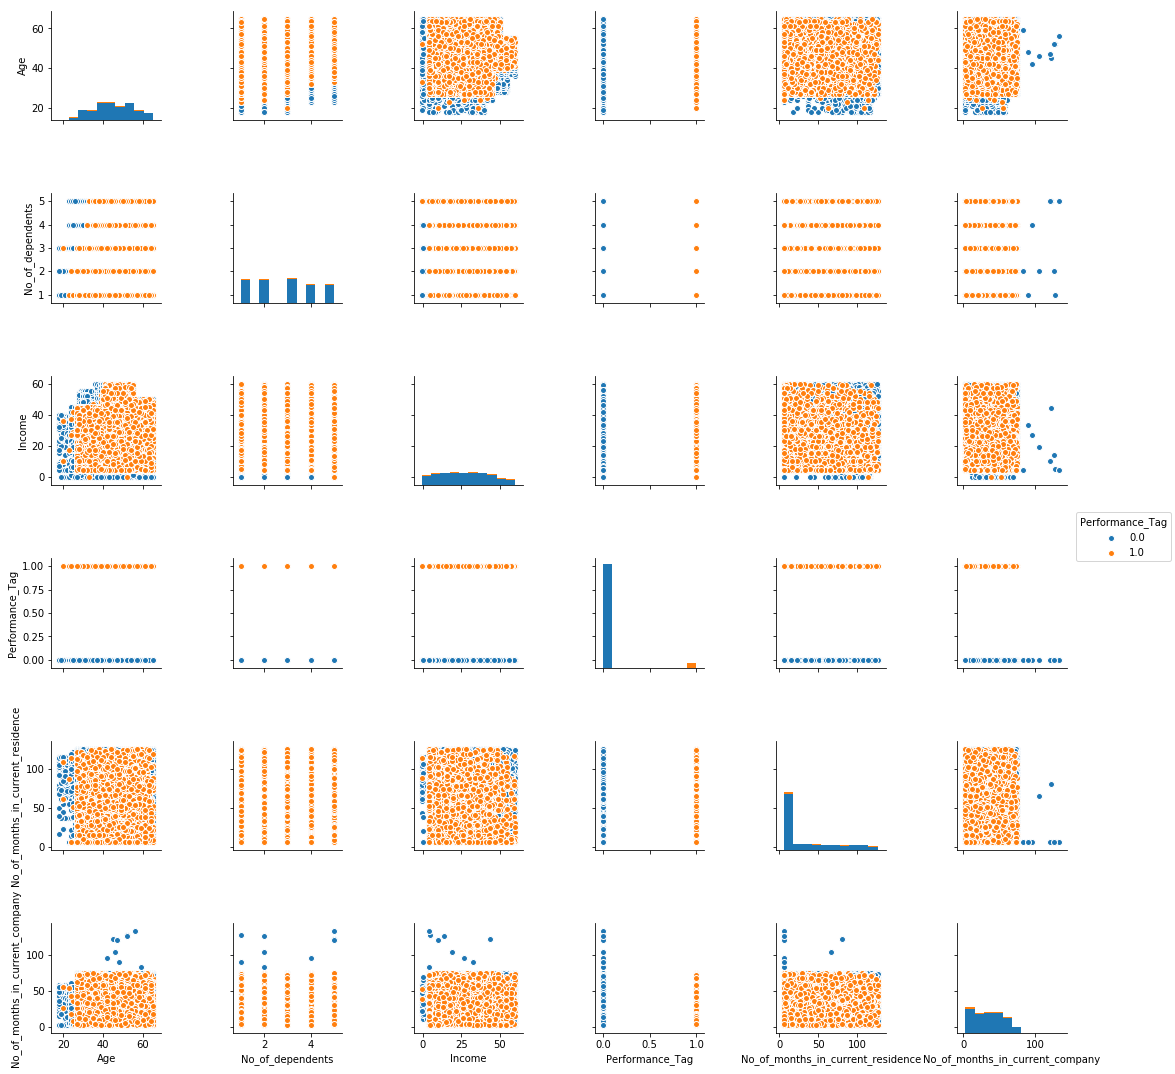

In [44]:
# paiwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(loan_data_numeric_pair, hue = "Performance_Tag")
plt.show()

We dont particularly see a linear relationship in any of the features

In [45]:
# correlation matrix
cor = loan_data_numeric.corr()
cor

Application_ID       Age  \
Application_ID                                            1.000000  0.000747   
Age                                                       0.000747  1.000000   
No_of_dependents                                         -0.005396  0.165330   
Income                                                    0.001564  0.059069   
No_of_months_in_current_residence                         0.000323 -0.065209   
No_of_months_in_current_company                          -0.002924 -0.024505   
No_of_times_90_DPD_or_worse_in_last_6_months             -0.004198 -0.017232   
No_of_times_60_DPD_or_worse_in_last_6_months             -0.000590 -0.020477   
No_of_times_30_DPD_or_worse_in_last_6_months             -0.000692 -0.021457   
No_of_times_90_DPD_or_worse_in_last_12_months            -0.001010 -0.021234   
No_of_times_60_DPD_or_worse_in_last_12_months             0.001084 -0.020380   
No_of_times_30_DPD_or_worse_in_last_12_months            -0.000667 -0.022021   
Avgas_CC_Utilization_in_last_12_months                    0.001872 -0.006127   
No_of_trades_opened_in_last_6_months                      0.001277  0.014445   
No_of_trades_opened_in_last_12_months                    -0.000089  0.014709   
No_of_PL_trades_opened_in_last_6_months                  -0.001010  0.010947   
No_of_PL_trades_opened_in_last_12_months                 -0.001844  0.010102   
No_of_Inquiries_in_last_6_months_excluding_home...       -0.000347  0.011038   
No_of_Inquiries_in_last_12_months_excluding_hom...       -0.001288  0.014780   
Presence_of_open_home_loan                                0.000317 -0.009571   
Outstanding_Balance                                      -0.000081 -0.007259   
Total_No_of_Trades                                        0.001704  0.019892   
Presence_of_open_auto_loan                                0.007211 -0.010408   
Performance_Tag                                           0.001910 -0.002488   

                                                    No_of_dependents  \
Application_ID                                             -0.005396   
Age                                                         0.165330   
No_of_dependents                                            1.000000   
Income                                                      0.027060   
No_of_months_in_current_residence                          -0.004714   
No_of_months_in_current_company                            -0.006899   
No_of_times_90_DPD_or_worse_in_last_6_months               -0.001616   
No_of_times_60_DPD_or_worse_in_last_6_months               -0.000809   
No_of_times_30_DPD_or_worse_in_last_6_months               -0.001819   
No_of_times_90_DPD_or_worse_in_last_12_months              -0.001187   
No_of_times_60_DPD_or_worse_in_last_12_months               0.001164   
No_of_times_30_DPD_or_worse_in_last_12_months              -0.000344   
Avgas_CC_Utilization_in_last_12_months                     -0.005940   
No_of_trades_opened_in_last_6_months                       -0.004531   
No_of_trades_opened_in_last_12_months                      -0.005274   
No_of_PL_trades_opened_in_last_6_months                    -0.003874   
No_of_PL_trades_opened_in_last_12_months                   -0.005756   
No_of_Inquiries_in_last_6_months_excluding_home...         -0.008899   
No_of_Inquiries_in_last_12_months_excluding_hom...         -0.008962   
Presence_of_open_home_loan                                  0.002996   
Outstanding_Balance                                         0.000831   
Total_No_of_Trades                                         -0.001975   
Presence_of_open_auto_loan                                 -0.002273   
Performance_Tag                                            -0.001022   

                                                      Income  \
Application_ID                                      0.001564   
Age                                                 0.059069   
No_of_dependents                                    0.0270

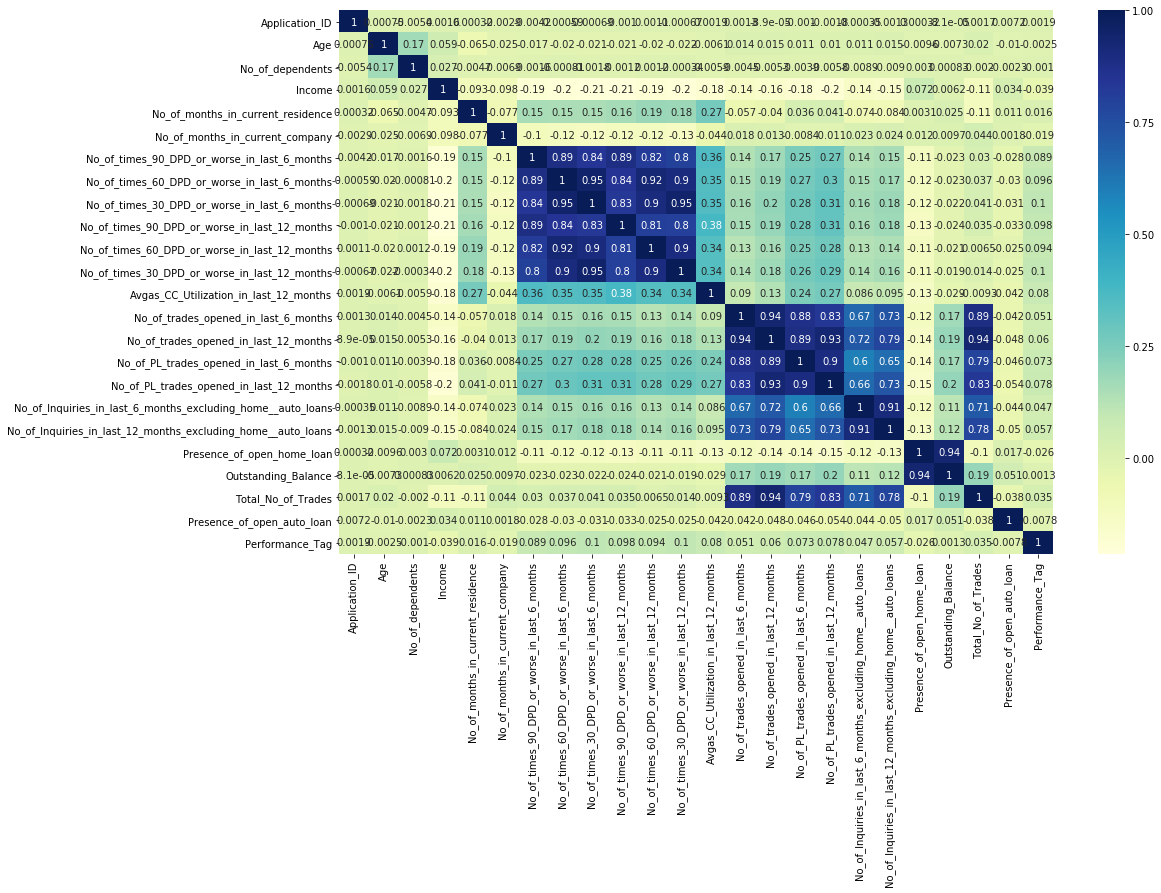

In [46]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,10))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

We do see variables with high correlation too, but we will only go by the features that show up as top in the IV method.

## Gender

In [47]:
count_prospects_gender = Loan_Data.groupby('Gender')['Performance Tag'].sum().reset_index(name = 'count_prospects')
No_of_prospect_gender = Loan_Data.groupby('Gender')['Performance Tag'].count().reset_index(name = 'No_of_prospects')
agg_gender = count_prospects_gender.merge(No_of_prospect_gender, on = 'Gender')
agg_gender['default_rate'] = 100*(agg_gender['count_prospects']/agg_gender['No_of_prospects']).round(4)

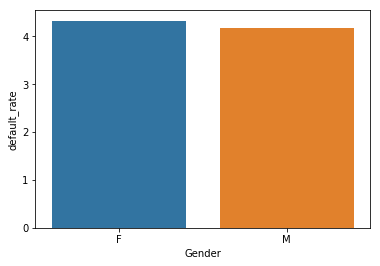

In [48]:
ax = sns.barplot(x='Gender', y='default_rate', data=agg_gender)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

## Marital Status

In [49]:
count_prospects_marital = Loan_Data.groupby('Marital Status (at the time of application)')['Performance Tag'].sum().reset_index(name = 'count_prospects')
No_of_prospect_marital = Loan_Data.groupby('Marital Status (at the time of application)')['Performance Tag'].count().reset_index(name = 'No_of_prospects')
agg_marital = count_prospects_marital.merge(No_of_prospect_marital, on = 'Marital Status (at the time of application)')
agg_marital['default_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No_of_prospects']).round(4)

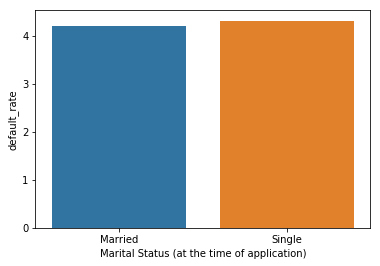

In [50]:
ax = sns.barplot(x='Marital Status (at the time of application)', y='default_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

## Income Bins

In [51]:
#Income
bins = np.arange(0,loan_data_numeric['Income'].max() + 50, 10)
loan_data_numeric['income_bins'] = pd.cut(loan_data_numeric['Income'], bins, include_lowest=True)

In [52]:
No_of_prospect = loan_data_numeric.groupby('income_bins')['Performance_Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = loan_data_numeric.groupby('income_bins')['Performance_Tag'].sum().reset_index(name = 'count_prospects')

In [53]:
agg_income = No_of_prospect.merge(count_prospects, on='income_bins')
agg_income['default_rate'] = 100*(agg_income['count_prospects']/agg_income['No.of_prospect']).round(3)
agg_income

income_bins  No.of_prospect  count_prospects  default_rate
0  (-0.001, 10.0]           12543            696.0           5.5
1    (10.0, 20.0]           13135            599.0           4.6
2    (20.0, 30.0]           13361            584.0           4.4
3    (30.0, 40.0]           13386            478.0           3.6
4    (40.0, 50.0]           10640            377.0           3.5
5    (50.0, 60.0]            5496            157.0           2.9
6    (60.0, 70.0]               0              0.0           NaN
7    (70.0, 80.0]               0              0.0           NaN
8    (80.0, 90.0]               0              0.0           NaN
9   (90.0, 100.0]               0              0.0           NaN

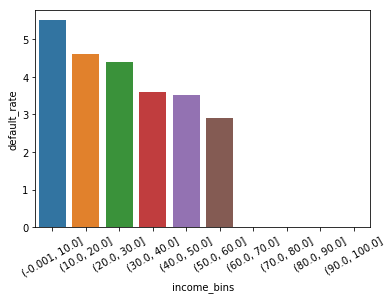

In [54]:
ax = sns.barplot(x='income_bins', y='default_rate', data=agg_income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

We can clearly conclude that the lower income groups have more chances of being a default

## Age Bins

In [55]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates
bins = np.arange(10,loan_data_numeric['Age'].max() + 10, 10)
loan_data_numeric['age_bins'] = pd.cut(loan_data_numeric['Age'], bins, include_lowest=True)

In [56]:
No_of_prospect = loan_data_numeric.groupby('age_bins')['Performance_Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = loan_data_numeric[loan_data_numeric['Performance_Tag']==1].groupby('age_bins')['Performance_Tag'].count().reset_index(name = 'count_prospects')

In [57]:
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')
agg_age['default_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)
agg_age

age_bins  No.of_prospect  count_prospects  default_rate
0  (9.999, 20.0]              75                2           2.7
1   (20.0, 30.0]            5681              233           4.1
2   (30.0, 40.0]           18371              819           4.5
3   (40.0, 50.0]           22490              936           4.2
4   (50.0, 60.0]           17252              707           4.1
5   (60.0, 70.0]            4770              196           4.1

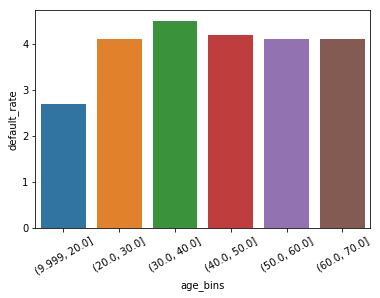

In [58]:
ax = sns.barplot(x='age_bins', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()
#the default rate is same among the youngest and the eldest

Either the youngest lot or the retirement lot have more chances of defaulting.

## Bivariate Analysis

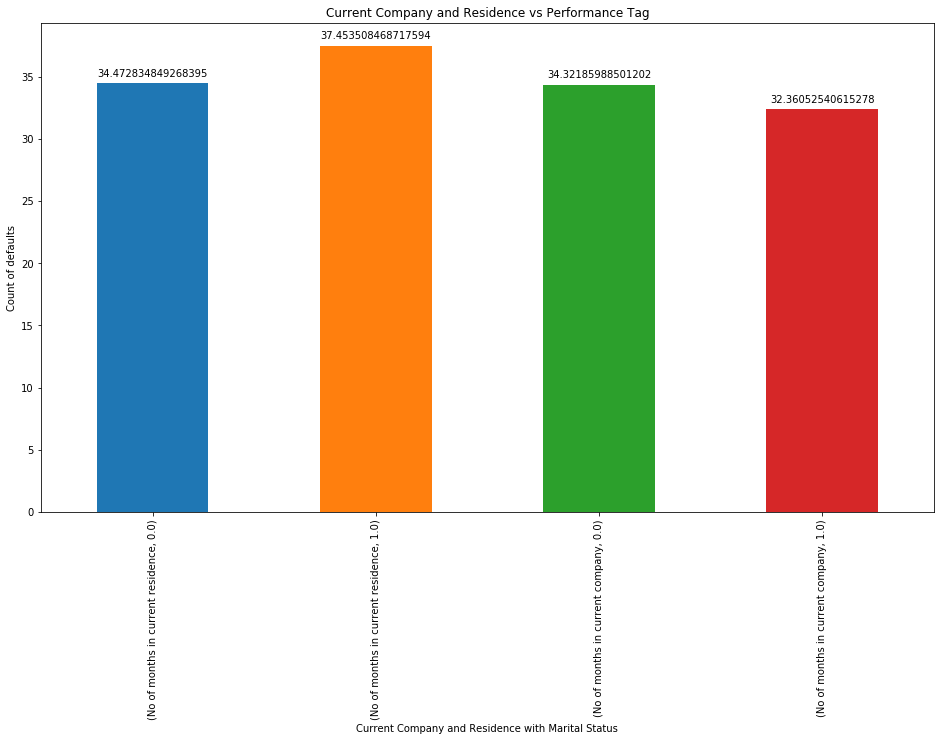

In [59]:
plt.rcParams["figure.figsize"] = [16,9]
ax=Loan_Data[['No of months in current residence',
                              'No of months in current company', 
                              'Performance Tag'
                             ]].groupby(['Performance Tag']).mean().unstack(fill_value=0).plot.bar()
plt.xlabel("Current Company and Residence with Marital Status")
plt.ylabel("Count of defaults")
plt.title("Current Company and Residence vs Performance Tag") 

rects = ax.patches

#Labelling each bar
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Create annotation
    plt.annotate(
        y_value,                      # what value to use as label, here it is height of bar. So y_value
       (x_value, y_value),            # Place label at end of the bar
        xytext=(0,5),                 # Vertically shift label by 5
        textcoords="offset points",   # Interpret `xytext` as offset in points
        ha='center',                  # Horizontally center label
        va='bottom')                  # Vertically align label 
    
plt.show()

No of months in the current residence seems to be a good determinant for defaults

## Multivariate Analysis

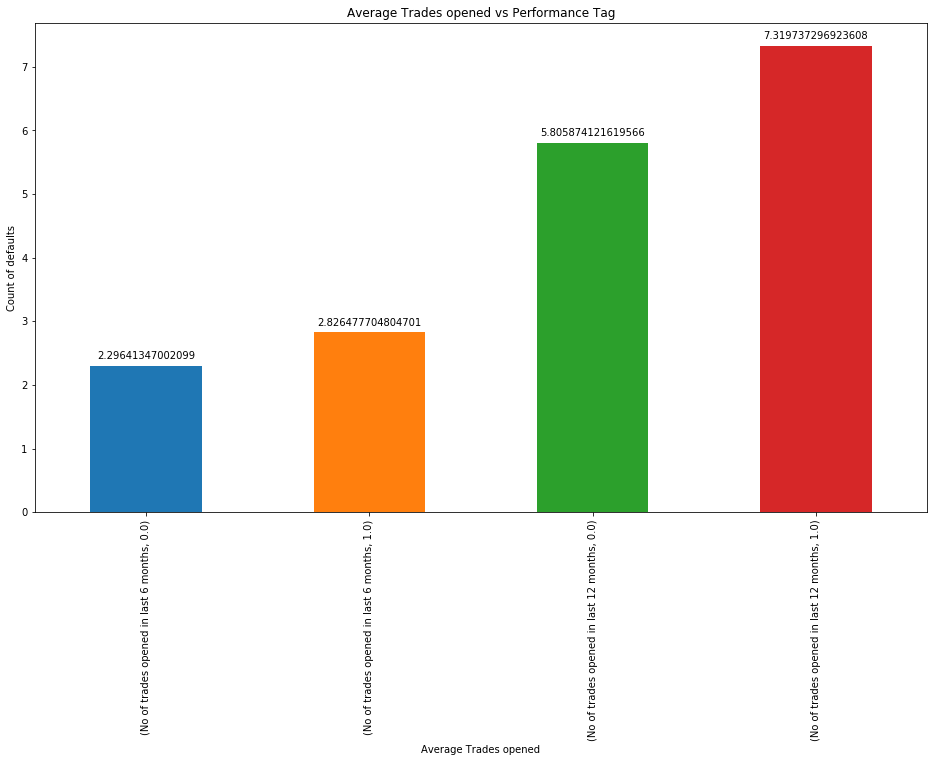

In [60]:
plt.rcParams["figure.figsize"] = [16,9]
ax=Loan_Data[['No of trades opened in last 6 months',
                              'No of trades opened in last 12 months',  
                              'Marital Status (at the time of application)',                     
                              'Performance Tag'
                             ]].groupby(['Performance Tag']).mean().unstack(fill_value=0).plot.bar()
plt.xlabel("Average Trades opened")
plt.ylabel("Count of defaults")
plt.title("Average Trades opened vs Performance Tag") 

rects = ax.patches

#Labelling each bar
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Create annotation
    plt.annotate(
        y_value,                      # what value to use as label, here it is height of bar. So y_value
       (x_value, y_value),            # Place label at end of the bar
        xytext=(0,5),                 # Vertically shift label by 5
        textcoords="offset points",   # Interpret `xytext` as offset in points
        ha='center',                  # Horizontally center label
        va='bottom')                  # Vertically align label 
    
plt.show()

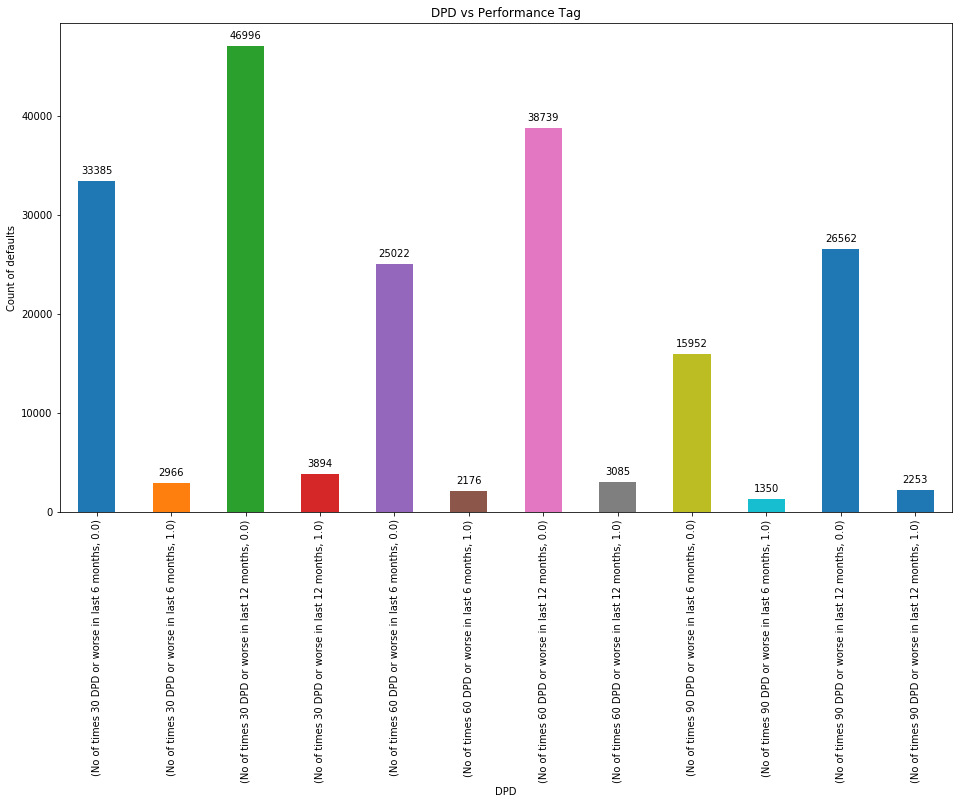

In [61]:
plt.rcParams["figure.figsize"] = [16,9]
ax=Loan_Data[['No of times 30 DPD or worse in last 6 months',
                              'No of times 30 DPD or worse in last 12 months',
                              'No of times 60 DPD or worse in last 6 months',
                              'No of times 60 DPD or worse in last 12 months',
                              'No of times 90 DPD or worse in last 6 months',
                              'No of times 90 DPD or worse in last 12 months',
                              'Performance Tag'
                             ]].groupby(['Performance Tag']).sum().unstack(fill_value=0).plot.bar()
plt.xlabel("DPD")
plt.ylabel("Count of defaults")
plt.title("DPD vs Performance Tag") 

rects = ax.patches

#Labelling each bar
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Create annotation
    plt.annotate(
        y_value,                      # what value to use as label, here it is height of bar. So y_value
       (x_value, y_value),            # Place label at end of the bar
        xytext=(0,5),                 # Vertically shift label by 5
        textcoords="offset points",   # Interpret `xytext` as offset in points
        ha='center',                  # Horizontally center label
        va='bottom')                  # Vertically align label 
    
plt.show()

DPD are not exactly helping us determine the default patterns

In [62]:
# take a back up of the final cleansed data set before dummy variables creation
Loan_Data_Original = Loan_Data

# Step 5: WOE and IV

In [63]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

In [64]:
Loan_Data_test = Loan_Data.drop('Application ID', axis = 1)

In [65]:
Loan_Data_test.loc[Loan_Data_test['Performance Tag'] == 0.0, 'Performance Tag'] = -1.0
Loan_Data_test.loc[Loan_Data_test['Performance Tag'] == 1.0, 'Performance Tag'] = 0.0
Loan_Data_test.loc[Loan_Data_test['Performance Tag'] == -1.0, 'Performance Tag'] = 1.0

print("Number of 1's :", Loan_Data_test['Performance Tag'].sum())
print('Loan_Data_test shape :', Loan_Data_test.shape)

Number of 1's : 65746.0
Loan_Data_test shape : (68639, 28)


In [66]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)


def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [67]:
X = Loan_Data_test.drop(['Performance Tag'], axis= 1)
y = Loan_Data_test['Performance Tag']

In [68]:
final_iv, IV = data_vars(X,y)

In [69]:
final_iv

VAR_NAME            MIN_VALUE  \
0                                                 Age                   18   
1                                                 Age                   41   
2                                                 Age                   51   
3                                              Gender                    F   
4                                              Gender                    M   
5         Marital Status (at the time of application)              Married   
6         Marital Status (at the time of application)               Single   
7                                    No of dependents                    1   
8                                    No of dependents                    4   
9                                              Income                 -0.5   
10                                             Income                   11   
11                                             Income                   19   
12                                             Income                   28   
13                                             Income                   36   
14                                             Income                   45   
15                                          Education             Bachelor   
16                                          Education              Masters   
17                                          Education               Others   
18                                          Education                  Phd   
19                                          Education         Professional   
20                                        Profession                   SAL   
21                                        Profession                    SE   
22                                        Profession               SE_PROF   
23                                  Type of residence     Company provided   
24                                  Type of residence  Living with Parents   
25                                  Type of residence               Others   
26                                  Type of residence                Owned   
27                                  Type of residence               Rented   
28                  No of months in current residence                    6   
29                  No of months in current residence                   11   
30                    No of months in current company                    3   
31                    No of months in current company                   18   
32                    No of months in current company                   35   
33                    No of months in current company                   52   
34       No of times 90 DPD or worse in last 6 months                    0   
35       No of times 90 DPD or worse in last 6 months                    2   
36       No of times 60 DPD or worse in last 6 months                    0   
37       No of times 60 DPD or worse in last 6 months                    2   
38       No of times 30 DPD or worse in last 6 months                    0   
39       No of times 30 DPD or worse in last 6 months                    2   
40      No of times 90 DPD or worse in last 12 months                    0   
41      No of times 90 DPD or worse in last 12 months                    2   
42      No of times 60 DPD or worse in last 12 months                    0   
43      No of times 60 DPD or worse in last 12 months                    2   
44      No of times 30 DPD or worse in last 12 months                    0   
45      No of times 30 DPD or worse in last 12 months                    2   
46             Avgas CC Utilization in last 12 months                    0   
47             Avgas CC Utilization in last 12 months                    9   
48             Avgas CC Utilization in last 12 months                   16   
49             Avgas CC Utilization in last 12 months                   46   
50               No of trades opened in last 6 months              

In [70]:
IV = IV.sort_values('IV', ascending = False)

In [71]:
IV

VAR_NAME        IV
1              Avgas CC Utilization in last 12 months  0.298289
19              No of trades opened in last 12 months  0.272471
6   No of Inquiries in last 12 months (excluding h...  0.241950
13      No of times 30 DPD or worse in last 12 months  0.191060
8            No of PL trades opened in last 12 months  0.181050
25                                 Total No of Trades  0.148848
14       No of times 30 DPD or worse in last 6 months  0.147085
15      No of times 60 DPD or worse in last 12 months  0.139600
9             No of PL trades opened in last 6 months  0.127297
17      No of times 90 DPD or worse in last 12 months  0.096709
20               No of trades opened in last 6 months  0.096412
7   No of Inquiries in last 6 months (excluding ho...  0.094704
16       No of times 60 DPD or worse in last 6 months  0.090428
12                  No of months in current residence  0.052906
4                                              Income  0.037233
18       No of times 90 DPD or worse in last 6 months  0.030337
23                         Presence of open home loan  0.017324
11                    No of months in current company  0.013051
21                                Outstanding Balance  0.006966
24                                        Profession   0.002077
22                         Presence of open auto loan  0.001584
26                                  Type of residence  0.000889
0                                                 Age  0.000819
2                                           Education  0.000814
3                                              Gender  0.000268
5         Marital Status (at the time of application)  0.000094
10                                   No of dependents  0.000081

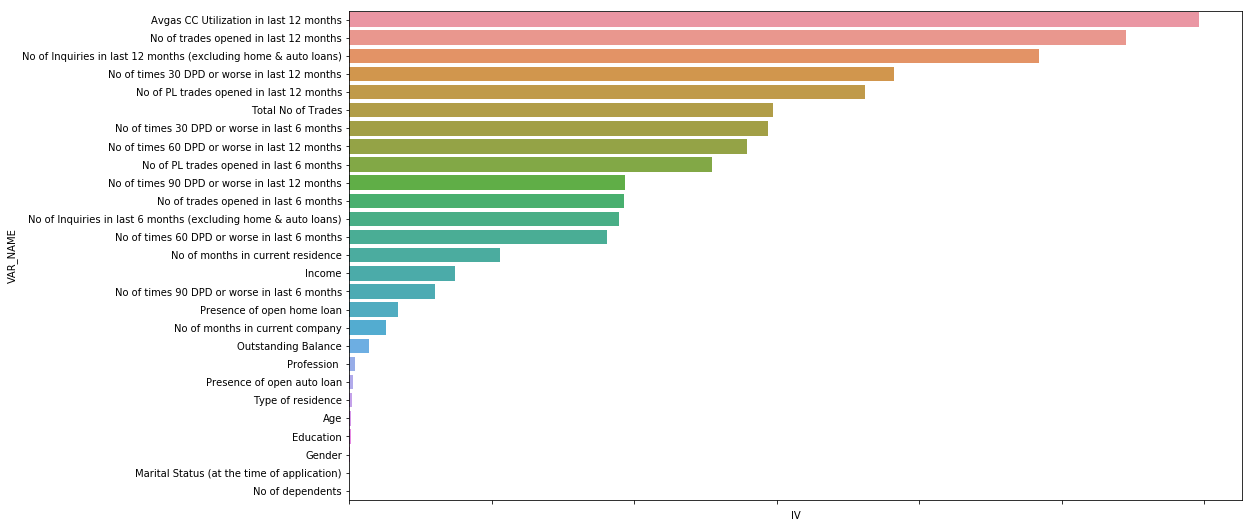

In [72]:
ax = sns.barplot(x='IV', y='VAR_NAME', data=IV)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

# Step 6: Data Preparation

In [73]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [74]:
# inspect the columns
Loan_Data.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presen

In [75]:
# Creating a dummy variable for the variable 'gender' and dropping the first one.
Gender = pd.get_dummies(Loan_Data['Gender'],prefix='Gender',drop_first=True)
Loan_Data = pd.concat([Loan_Data,Gender],axis=1)
# Creating dummy variable for marital status column
marital = pd.get_dummies(Loan_Data['Marital Status (at the time of application)'],prefix='Marital_Status',drop_first=True)
Loan_Data = pd.concat([Loan_Data,marital],axis=1)
# Creating dummy variable for dependants column
dependants = pd.get_dummies(Loan_Data['No of dependents'],prefix='Dependants',drop_first=True)
Loan_Data = pd.concat([Loan_Data,dependants],axis=1)
# Creating dummy variable for education column
Education = pd.get_dummies(Loan_Data['Education'],prefix='Education',drop_first=True)
Loan_Data = pd.concat([Loan_Data,Education],axis=1)
# Creating dummy variable for profession column
Profession = pd.get_dummies(Loan_Data['Profession '],prefix='Profession',drop_first=True)
Loan_Data = pd.concat([Loan_Data,Profession],axis=1)
# Creating dummy variable for residence column
Residence = pd.get_dummies(Loan_Data['Type of residence'],prefix='Residence',drop_first=True)
Loan_Data = pd.concat([Loan_Data,Residence],axis=1)
# Creating dummy variable for home loan column
HomeLoan = pd.get_dummies(Loan_Data['Presence of open home loan'],prefix='Home_Loan',drop_first=True)
Loan_Data = pd.concat([Loan_Data,HomeLoan],axis=1)
# Creating dummy variable for auto loan column
autoLoan = pd.get_dummies(Loan_Data['Presence of open auto loan'],prefix='Auto_Loan',drop_first=True)
Loan_Data = pd.concat([Loan_Data,autoLoan],axis=1)

In [76]:
# Drop all features for whom dummy variable has been created
Loan_Data.drop(columns = ['Gender','Marital Status (at the time of application)','No of dependents','Education','Profession ','Type of residence', 'Presence of open home loan', 'Presence of open auto loan'], inplace=True)

In [77]:
Loan_Data.head()

Application ID  Age  Income  No of months in current residence  \
0       954457215   48    40.0                                113   
1       432830445   31    55.0                                112   
2       941387308   32    46.0                                104   
3       392161677   43    53.0                                 94   
4       182011211   35    44.0                                112   

   No of months in current company  \
0                               56   
1                               46   
2                               49   
3                               53   
4                               43   

   No of times 90 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 60 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 30 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 90 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 60 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 30 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Avgas CC Utilization in last 12 months  \
0                                     4.0   
1                                     3.0   
2                                     7.0   
3                                    11.0   
4                                    12.0   

   No of trades opened in last 6 months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No of PL trades opened in last 6 months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No of PL trades opened in last 12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  0                
1     

In [78]:
### Checking the % of Converted in the data
Converted = (sum(Loan_Data['Performance Tag'])/len(Loan_Data['Performance Tag'].index))*100
Converted

4.214804994245254

### highly imbalanced data set, with a conversion data of just 4.21%

# Step 7:  Modelling Methods and Evaluation

## Model 1 - Logistic Regression

In [79]:
X = Loan_Data.drop(['Performance Tag'], axis= 1)
y = Loan_Data['Performance Tag']

In [80]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [81]:
#take only the important features from IV
X = X[['Application ID','Avgas CC Utilization in last 12 months', 'No of trades opened in last 12 months'
       ,'No of Inquiries in last 12 months (excluding home & auto loans)', 'No of times 30 DPD or worse in last 12 months'
       ,'No of PL trades opened in last 12 months', 'Total No of Trades', 'No of times 30 DPD or worse in last 6 months'
       , 'No of times 60 DPD or worse in last 12 months', 'No of PL trades opened in last 6 months']]

In [82]:
import random
random.seed( 30 )
random_seed = random.randint(25,50)
# random_seed

In [83]:
# Splitting the data into train and test
X_train_ID, X_test_ID, y_train, y_test = train_test_split(X,1.0 - y,train_size=0.7, test_size=0.3, random_state=random_seed)

In [84]:
X_train = X_train_ID.drop('Application ID', axis = 1)
X_test = X_test_ID.drop('Application ID', axis = 1)
Test_ID = X_test_ID['Application ID']

In [85]:
z_scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_z = z_scaler.fit_transform(X_train)
X_test_z = z_scaler.transform(X_test)

In [86]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

In [87]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train_z, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
col = ['Avgas CC Utilization in last 12 months', 'No of Inquiries in last 12 months (excluding home & auto loans)'
       , 'No of times 30 DPD or worse in last 12 months'
       ,'No of PL trades opened in last 12 months', 'Total No of Trades', 'No of times 30 DPD or worse in last 6 months'
       , 'No of times 60 DPD or worse in last 12 months', 'No of PL trades opened in last 6 months']
# Logistic regression model
X_train_sm = sm.add_constant(X_train_z)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48047
Model:                            GLM   Df Residuals:                    48037
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8083.8
Date:                Mon, 16 Sep 2019   Deviance:                       16168.
Time:                        09:04:19   Pearson chi2:                 4.70e+04
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2696      0.026    126.726      0.000       3.219       3.320
x1            -0.2033      0.024     -8.454      0.000      -0.250      -0.156
x2             0.0914      0.116      0.786      0.432      -0.137       0.319
x3            -0.2077      0.035     -5.869      0.000      -0.277      -0.138
x4            -0.1275      0.067     -1.892      0.059      -0.260       0.005
x5            -0.3062      0.070     -4.373      0.000      -0.443      -0.169
x6             0.1897      0.082      2.320      0.020       0.029       0.350
x7            -0.1360      0.071     -1.917      0.055      -0.275       0.003
x8             0.0596      0.046      1.292      0.196      -0.031       0.150
x9            -0.0783      0.051     -1.522      0.128      -0.179       0.023
==============================================================================
"""

In [89]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

array([0.94793324, 0.97822517, 0.97903434, 0.97596148, 0.93713463,
       0.91564808, 0.97838488, 0.97947226, 0.96491798, 0.97874963])

In [90]:
y_train_pred_final = pd.DataFrame({'Actual Response':y_train.values, 'Response_Prob':y_train_pred})
y_train_pred_final['Response Probability'] = y_train.index
y_train_pred_final.head()

Actual Response  Response_Prob  Response Probability
0              1.0       0.947933                 40425
1              1.0       0.978225                   545
2              1.0       0.979034                 17192
3              1.0       0.975961                 27759
4              1.0       0.937135                 40272

In [91]:
y_train_pred_final['Predicted'] = y_train_pred_final.Response_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Actual Response  Response_Prob  Response Probability  Predicted
0              1.0       0.947933                 40425          1
1              1.0       0.978225                   545          1
2              1.0       0.979034                 17192          1
3              1.0       0.975961                 27759          1
4              1.0       0.937135                 40272          1

In [92]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Actual Response'], y_train_pred_final.Predicted )
print(confusion)

[[    0  2028]
 [    0 46019]]


In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(3, 3))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [94]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Actual Response'], y_train_pred_final.Response_Prob, drop_intermediate = False )

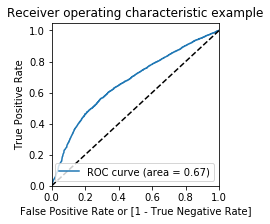

In [95]:
draw_roc(y_train_pred_final['Actual Response'], y_train_pred_final.Response_Prob)

In [96]:
# Let's check the overall accuracy.
from sklearn.metrics import accuracy_score

In [97]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final['Actual Response'], y_train_pred_final.Predicted)

0.9577913293233709

In [98]:
auc_score = metrics.roc_auc_score( y_train_pred_final['Actual Response'], y_train_pred_final.Response_Prob )
print ('Auc for logistic regression = ', auc_score)

Auc for logistic regression =  0.666238122938073


### AUC for Logistic Regression comes at 66.6%

## Model 2 - Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier

Hyper parameter tuning for DT

In [100]:
# GridSearchCV to find optimal max_depth, min samples split, and min samples leaf

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {
    'max_depth': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'min_samples_leaf': range(5, 200, 20)   
}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                    scoring="accuracy",
                    n_jobs = -1,
                    verbose = 1)

tree.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  3.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(5, 200, 20), 'min_samples_split': range(5, 200, 20), 'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [101]:
print(tree.best_estimator_)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',tree.best_score_,'using',tree.best_params_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=45,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')
We can get accuracy of 0.9577913293233709 using {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 45}


In [102]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=5,
                                  min_samples_split=45)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=45,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [103]:
pred = clf_gini.predict_proba(X_test)

In [104]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true = y_test, y_score = pred[:,1])
print ('AUC for Decision Tree =', auc)

AUC for Decision Tree = 0.6832826169701981


## AUC for Decision Tree comes at 68.3%

## Model 3 - Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})

In [106]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Top features from Random Forest modelling

In [107]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

importance
Avgas CC Utilization in last 12 months                0.336381
No of Inquiries in last 12 months (excluding ho...    0.157411
Total No of Trades                                    0.135395
No of trades opened in last 12 months                 0.107547
No of PL trades opened in last 12 months              0.085980
No of PL trades opened in last 6 months               0.065404
No of times 60 DPD or worse in last 12 months         0.049267
No of times 30 DPD or worse in last 12 months         0.037775
No of times 30 DPD or worse in last 6 months          0.024840

Lets try and optimise the model

In [108]:
# GridSearchCV to find optimal n_estimators for max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [50,75,100,125,150,175,200,225,250,275,300], 
    'max_features': [5]
}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="accuracy",
                    n_jobs = -1,
                    verbose = 1,
                    return_train_score=True
                 )
rf.fit(X_train, y_train)

Fitting 5 folds for each of 132 candidates, totalling 660 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 660 out of 660 | elapsed: 15.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300], 'max_features': [5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [109]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rf.best_score_,'using',rf.best_params_)

We can get accuracy of 0.9577913293233709 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 50}


Modelling with the best hyper parameters

In [110]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=50)

In [111]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [112]:
# predict
predictions = rfc.predict(X_test)
pred = rfc.predict_proba(X_test)

In [113]:
auc = roc_auc_score(y_true = y_test, y_score = pred[:,1])
print( 'Auc for Radom Forest =',auc)

Auc for Radom Forest = 0.6932367568758642


### AUC for Random Forest shows 69.4%

## Since Random Forest shows the highest Area Under the Curve, we will choose Random Forest as our best model

In [114]:
# predict
X_df = X.drop(['Application ID'], axis = 1)
predictions = rfc.predict(X_df)

# Step 8: Application Score Card

In [115]:
predictions = rfc.predict_proba(X_test)

In [116]:
from sklearn import metrics
score_card_data = pd.concat([Test_ID,y_test], axis=1)

In [117]:
score_card_data['bad'] = predictions[:,0]
score_card_data['good'] = predictions[:,1]
score_card_data['odds'] = np.log(score_card_data['good']/score_card_data['bad'])

In [118]:
PDO = 20.0
BaseScore = 400.0
Odds = 10.0
Factor = PDO/np.log(2)
Offset = BaseScore-(Factor*np.log(Odds))
score_card_data['score'] = np.round(Offset+(Factor*score_card_data['odds']))

In [119]:
score_card_data.head()

Application ID  Performance Tag       bad      good      odds  score
48631       865593362              1.0  0.056058  0.943942  2.823673  415.0
20729       389464627              1.0  0.028930  0.971070  3.513532  435.0
15749       176299618              1.0  0.013516  0.986484  4.290293  457.0
30746       914602898              0.0  0.060276  0.939724  2.746656  413.0
10053       901018435              0.0  0.013516  0.986484  4.290293  457.0

In [120]:
fpr, tpr, thresholds = metrics.roc_curve(y_true = y_test, y_score = predictions[:,1])
cut_off_prediction_probability_score = thresholds[np.argmax(tpr-fpr)]
cut_off_score = np.round(Offset+(Factor*np.log(cut_off_prediction_probability_score/(1-cut_off_prediction_probability_score))))
print(cut_off_score, cut_off_prediction_probability_score)

420.0 0.9528146836224383


### Our cut off score is 420

In [121]:
reject = score_card_data[score_card_data['Performance Tag'] == 0.0]
print(reject.describe())

       Application ID  Performance Tag         bad        good        odds  \
count    8.650000e+02            865.0  865.000000  865.000000  865.000000   
mean     4.912406e+08              0.0    0.058318    0.941682    2.890474   
std      2.886912e+08              0.0    0.022516    0.022516    0.547776   
min      7.645580e+05              0.0    0.011655    0.895505    2.148251   
25%      2.459207e+08              0.0    0.041793    0.921721    2.465958   
50%      4.846622e+08              0.0    0.058045    0.941955    2.786746   
75%      7.405772e+08              0.0    0.078279    0.958207    3.132345   
max      9.998290e+08              0.0    0.104495    0.988345    4.440312   

            score  
count  865.000000  
mean   416.968786  
std     15.817615  
min    396.000000  
25%    405.000000  
50%    414.000000  
75%    424.000000  
max    462.000000  


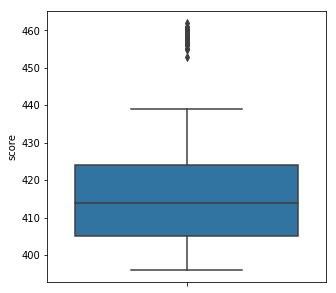

In [122]:
plt.figure(figsize = [5,5] )
sns.boxplot(y='score', data=reject)
plt.show()

In [123]:
approved = score_card_data[score_card_data['Performance Tag'] == 1.0]
print(approved.describe())

       Application ID  Performance Tag           bad          good  \
count    1.972700e+04          19727.0  19727.000000  19727.000000   
mean     4.968928e+08              1.0      0.041532      0.958468   
std      2.889818e+08              0.0      0.024572      0.024572   
min      1.979560e+05              1.0      0.011427      0.889414   
25%      2.458452e+08              1.0      0.013782      0.942304   
50%      4.944047e+08              1.0      0.037743      0.962257   
75%      7.487488e+08              1.0      0.057696      0.986218   
max      1.000073e+09              1.0      0.110586      0.988573   

               odds         score  
count  19727.000000  19727.000000  
mean       3.348760    430.183251  
std        0.709371     20.470565  
min        2.084771    394.000000  
25%        2.793135    414.000000  
50%        3.238470    427.000000  
75%        4.270534    457.000000  
max        4.460302    462.000000  


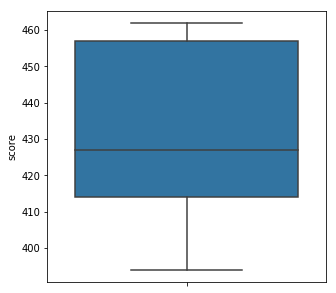

In [124]:
plt.figure(figsize = [5,5] )
sns.boxplot(y='score', data=approved)
plt.show()

In [125]:
total = score_card_data
print(total.describe())

       Application ID  Performance Tag           bad          good  \
count    2.059200e+04     20592.000000  20592.000000  20592.000000   
mean     4.966553e+08         0.957993      0.042237      0.957763   
std      2.889649e+08         0.200609      0.024719      0.024719   
min      1.979560e+05         0.000000      0.011427      0.889414   
25%      2.458515e+08         1.000000      0.013881      0.941026   
50%      4.941182e+08         1.000000      0.038990      0.961010   
75%      7.480629e+08         1.000000      0.058974      0.986119   
max      1.000073e+09         1.000000      0.110586      0.988573   

               odds         score  
count  20592.000000  20592.000000  
mean       3.329509    429.628157  
std        0.709304     20.468667  
min        2.084771    394.000000  
25%        2.769875    413.000000  
50%        3.204676    426.000000  
75%        4.263279    457.000000  
max        4.460302    462.000000  


### Financial Benefit Calculation

In [126]:
score_card_data['Finance'] = np.where(score_card_data['score']>=cut_off_score, 1, 0)

In [127]:
score_card_data.tail()

Application ID  Performance Tag       bad      good      odds  score  \
43600       171447496              1.0  0.053992  0.946008  2.863423  416.0   
9882        122177521              1.0  0.012445  0.987555  4.373884  460.0   
40857       325094747              1.0  0.039601  0.960399  3.188506  426.0   
10859       147440009              1.0  0.014024  0.985976  4.252860  456.0   
26785       117048320              1.0  0.028023  0.971977  3.546301  436.0   

       Finance  
43600        0  
9882         1  
40857        1  
10859        1  
26785        1

In [128]:
# Creating a dummy variable for the variable 'gender' and dropping the first one.
Gender = pd.get_dummies(rejected_rows['Gender'],prefix='Gender',drop_first=True)
#Adding the results to the master dataframe
rejected_rows = pd.concat([rejected_rows,Gender],axis=1)

# Creating dummy variable for marital status column
marital = pd.get_dummies(rejected_rows['Marital Status (at the time of application)'],prefix='Marital_Status',drop_first=True)
rejected_rows = pd.concat([rejected_rows,marital],axis=1)

# Creating dummy variable for dependants column
dependants = pd.get_dummies(rejected_rows['No of dependents'],prefix='Dependants',drop_first=True)
rejected_rows = pd.concat([rejected_rows,dependants],axis=1)

# Creating dummy variable for dependants column
Education = pd.get_dummies(rejected_rows['Education'],prefix='Education',drop_first=True)
rejected_rows = pd.concat([rejected_rows,Education],axis=1)

# Creating dummy variable for dependants column
Profession = pd.get_dummies(rejected_rows['Profession '],prefix='Profession',drop_first=True)
rejected_rows = pd.concat([rejected_rows,Profession],axis=1)

# Creating dummy variable for dependants column
Residence = pd.get_dummies(rejected_rows['Type of residence'],prefix='Residence',drop_first=True)
rejected_rows = pd.concat([rejected_rows,Residence],axis=1)

# Creating dummy variable for dependants column
HomeLoan = pd.get_dummies(rejected_rows['Presence of open home loan'],prefix='Home_Loan',drop_first=True)
rejected_rows = pd.concat([rejected_rows,HomeLoan],axis=1)

# Creating dummy variable for dependants column
autoLoan = pd.get_dummies(rejected_rows['Presence of open auto loan'],prefix='Auto_Loan',drop_first=True)
rejected_rows = pd.concat([rejected_rows,autoLoan],axis=1)

# Drop all features for whom dummy variable has been created
rejected_rows.drop(columns = ['Gender','Marital Status (at the time of application)','No of dependents','Education','Profession ','Type of residence', 'Presence of open home loan', 'Presence of open auto loan'], inplace=True)

In [129]:
rejected_rows.head()

Application ID  Age  Income  No of months in current residence  \
69609       906908303   35     6.0                                 22   
69610        10990583   47    12.0                                122   
69611       589678446   46     7.0                                 10   
69612       809411322   41    18.0                                  6   
69613       150246616   42    17.0                                  8   

       No of months in current company  \
69609                               18   
69610                               25   
69611                               31   
69612                               47   
69613                               49   

       No of times 90 DPD or worse in last 6 months  \
69609                                             0   
69610                                             1   
69611                                             3   
69612                                             1   
69613                                             2   

       No of times 60 DPD or worse in last 6 months  \
69609                                             0   
69610                                             1   
69611                                             4   
69612                                             3   
69613                                             2   

       No of times 30 DPD or worse in last 6 months  \
69609                                             2   
69610                                             1   
69611                                             5   
69612                                             4   
69613                                             4   

       No of times 90 DPD or worse in last 12 months  \
69609                                              1   
69610                                              3   
69611                                              3   
69612                                              3   
69613                                              3   

       No of times 60 DPD or worse in last 12 months  \
69609                                              2   
69610                                              2   
69611                                              5   
69612                                              4   
69613                                              2   

       No of times 30 DPD or worse in last 12 months  \
69609                                              3   
69610                                              2   
69611                                              6   
69612                                              5   
69613                                              6   

       Avgas CC Utilization in last 12 months  \
69609                                    30.0   
69610                                    16.0   
69611                                    83.0   
69612                                    87.0   
69613                                    42.0   

       No of trades opened in last 6 months  \
69609                                   4.0   
69610                                   3.0   
69611                                   2.0   
69612                                   2.0   
69613                                   3.0   

       No of trades opened in last 12 months  \
69609                                     12   
69610                                      7   
69611                                      7   
69612                                      7   
69613                                      7   

       No of PL trades opened in last 6 months  \
69609                                        3   
69610                                        3   
69611                                        2   
69612                                        1   
69613                                        2   

       No of PL trades opened in last 12 months  \
69609                                         7   
69610                                    

In [130]:
rejected_rows_ID = rejected_rows[['Application ID']]

In [131]:
rejected_rows_X_test = rejected_rows.drop(['Application ID', 'Performance Tag'], axis = 1)
rejected_rows_Y_test = rejected_rows['Performance Tag'].fillna(0)

In [132]:
rejected_rows_X_test.isnull().sum()
rejected_rows_X_test['Avgas CC Utilization in last 12 months'].fillna(0, inplace = True)

In [133]:
# Standardisation continuous features for X_train
rejected_rows_X_test_df = rejected_rows_X_test[['Avgas CC Utilization in last 12 months', 'No of trades opened in last 12 months'
       ,'No of Inquiries in last 12 months (excluding home & auto loans)', 'No of times 30 DPD or worse in last 12 months'
       ,'No of PL trades opened in last 12 months', 'Total No of Trades', 'No of times 30 DPD or worse in last 6 months'
       , 'No of times 60 DPD or worse in last 12 months', 'No of PL trades opened in last 6 months']]


In [134]:
# predict
predictions_rejected = rfc.predict_proba(rejected_rows_X_test_df)

In [135]:
from sklearn import metrics
score_card_data_rejections = pd.concat([rejected_rows_ID,rejected_rows_Y_test], axis=1)

In [136]:
score_card_data_rejections['bad'] = predictions_rejected[:,0]
score_card_data_rejections['good'] = predictions_rejected[:,1]
score_card_data_rejections['odds'] = np.log(score_card_data_rejections['good']/score_card_data_rejections['bad'])

In [137]:
score_card_data_rejections.head()

Application ID  Performance Tag       bad      good      odds
69609       906908303              0.0  0.079278  0.920722  2.452201
69610        10990583              0.0  0.069489  0.930511  2.594562
69611       589678446              0.0  0.089361  0.910639  2.321458
69612       809411322              0.0  0.094383  0.905617  2.261258
69613       150246616              0.0  0.094305  0.905695  2.262168

In [138]:
score_card_data_rejections['score'] = np.round(Offset+(Factor*score_card_data_rejections['odds']))
score_card_data_rejections['Finance'] = np.where(score_card_data_rejections['score']>=cut_off_score, 1, 0) #should use the final cut off score here

In [139]:
score_card_data_rejections[score_card_data_rejections['Finance'] == 1]
#out of 1425 rows

Application ID  Performance Tag       bad      good      odds  score  \
70428       920089991              0.0  0.046503  0.953497  3.020609  421.0   
70452       359980559              0.0  0.046795  0.953205  3.014048  421.0   
71152       856792433              0.0  0.046815  0.953185  3.013599  421.0   
71217       311209914              0.0  0.027875  0.972125  3.551765  436.0   

       Finance  
70428        1  
70452        1  
71152        1  
71217        1

### The model reduces the credit loss from 4% to 1%, thus the credit loss prevented is 3%. When the application score card is implemented the total revenue loss is reduced to 30%